In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

data = pd.read_csv('../data/deep_core_profiles_modified.csv')
target = data['theta G']
features = data[['clay', 'silt', 'sand']]

# combine features and target, then drop missing values
features_target_combined = pd.concat([features, target], axis=1)
features_target_combined_clean = features_target_combined.dropna()

# separate the cleaned features and target
features_clean = features_target_combined_clean[['clay', 'silt', 'sand']]
target_clean = features_target_combined_clean['theta G']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_clean, target_clean, test_size=0.2, random_state=42)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# predicting the target for the test set
y_pred = model.predict(X_test)

# evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# output the evaluation metrics
print(f"MAE: {mae}, MSE: {mse}, R^2: {r2}")


Coefficients: [0.31235861 0.2432297  0.07749014]
Intercept: -0.014606972096205928
MAE: 0.025907869522251367, MSE: 0.0013376934344277195, R^2: -0.5671444751923422


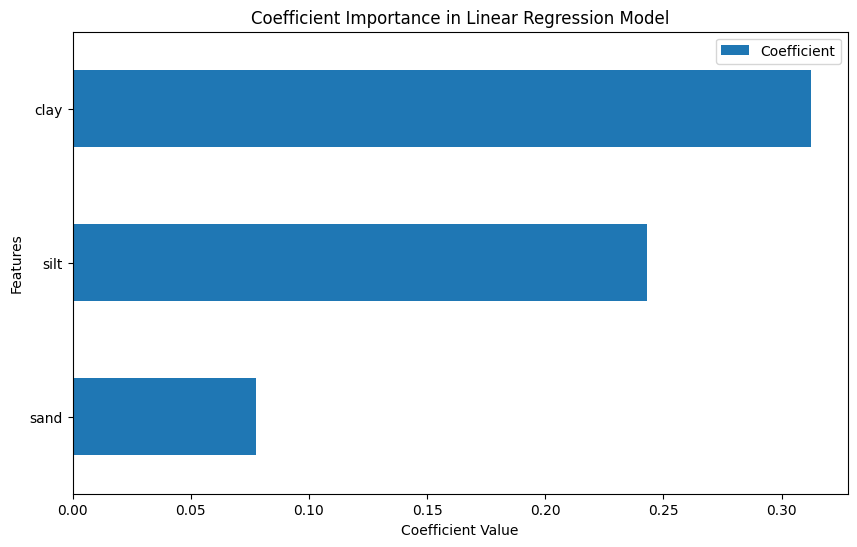

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

coefficients = model.coef_
feature_names = features_clean.columns

# Create a DataFrame for easier plotting
coef_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

# Plot
coef_df.sort_values(by='Coefficient', ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Coefficient Importance in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

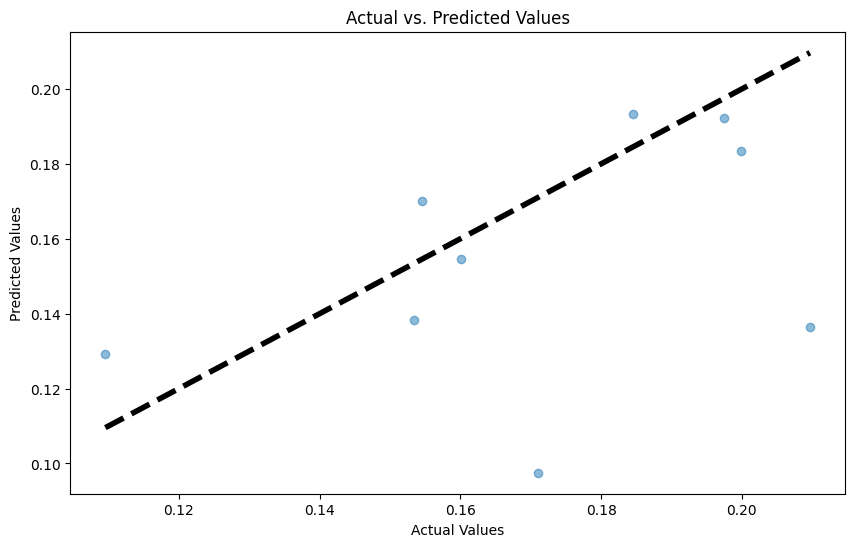

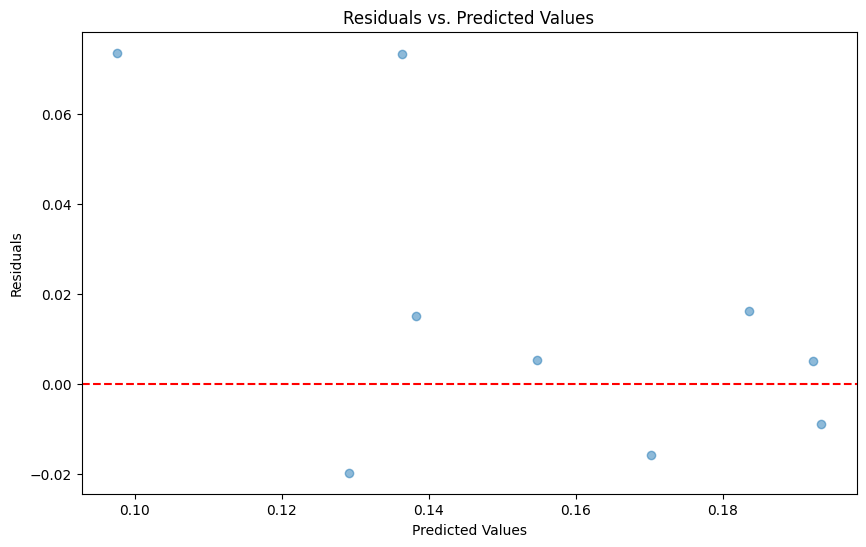

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()